# 1. Variable Objetivo
Para este proyecto se decidió identificar, comprender y relacionar los factores claves que llevan a las personas a cometer suicidio. Por lo que, la variable de respuesta elegida es la probabilidad de suicidio, de forma que podamos identificar aquellos grupos de alto o bajo riesgo de cometer suicidio, en base a los factores influyentes.

In [36]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [37]:
original_data = pd.read_csv('csv_files/datosLimpios.csv')
original_data.head()

,year,suicides_no,population,suicides/100k pop,gdp_for_year,gdp_per_capita,age_15-24,age_25-34,age_35-54,age_5-14,...,country_Thailand,country_Trinidad and Tobago,country_Turkey,country_Turkmenistan,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan
0,1987,21,312900,6.71,2.156625e+09,796.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1987,16,308000,5.19,2.156625e+09,796.0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,1987,14,289700,4.83,2.156625e+09,796.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1987,1,21800,4.59,2.156625e+09,796.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1987,9,274300,3.28,2.156625e+09,796.0,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [38]:
# Separar las características y la variable objetivo
X = original_data.drop('suicides/100k pop', axis=1)
y = original_data['suicides/100k pop']

# 2. Separación de Datos

Explique el método que siguió para obtener los conjuntos de entrenamiento y prueba, el porcentaje de datos que hay en cada uno y si se encuentran balanceados o no, en caso de que la variable respuesta sea categórica. Sí es cuantitativa analice los atípicos

## Preparación de la variable objetivo

Antes de proceder con la separación de los datos en conjuntos de entrenamiento y prueba, se llevó a cabo la transformación de la variable objetivo. Originalmente, la variable objetivo era continua, pero para los fines de este proyecto, se requería clasificar los factores que influyen en la probabilidad de un individuo de cometer suicidio. Por ello, se decidió agrupar la variable objetivo en cinco categorías:

- **Grupo 1:** Representa un 20% de probabilidad de cometer suicidio.
- **Grupo 2:** Representa un 40% de probabilidad de cometer suicidio.
- **Grupo 3:** Representa un 60% de probabilidad de cometer suicidio.
- **Grupo 4:** Representa un 80% de probabilidad de cometer suicidio.
- **Grupo 5:** Representa un 100% de probabilidad de cometer suicidio.

Cada grupo corresponde a un intervalo del 20% acumulable, utilizando el valor mínimo como cota inferior y el máximo como cota superior.

## Desbalance de los datos

Tras la categorización, se identificó un desbalance significativo entre los grupos. En particular, el grupo 1 contenía 26,154 filas, mientras que el grupo 5 sólo contaba con 5 filas.

## Generación de datos balanceados

Para abordar este desbalance, se aplicó la técnica de sobresampling usando la librería SMOTE (Synthetic Minority Over-sampling Technique). Se utilizó SMOTE con 4 estimadores para generar datos sintéticos y así equilibrar la cantidad de instancias en cada grupo.

## Resultados del balanceo

Después de aplicar SMOTE, se obtuvo una distribución equilibrada de los datos, con 26,154 filas en cada grupo. Estos datos balanceados se guardaron en un archivo CSV denominado `datosBalanceados.csv`.

Para la separación de los conjuntos para pruebas y entrenamiento se utilizó la librería de `sklearn` con un balance de 80%-20%, siendo entrenamiento y pruebas respectivamente.

In [39]:
# Definir los intervalos y etiquetas para categorizar la variable objetivo
bins = np.linspace(0, 224.97, 6)
labels = [1, 2, 3, 4, 5]

# Crear una copia de la variable objetivo categorizada
y_binned = pd.cut(y, bins, labels=labels, include_lowest=True)

In [40]:
# quiero ver cuantos datos hay en cada categoría. Es decir, cuantas x para cada y. 
y_binned.value_counts()

suicides/100k pop
1    26154
2     1365
3      267
4       29
5        5
Name: count, dtype: int64

In [41]:
# usar SMOTE para balancear las categorías, n_neighbors = 5
smote = SMOTE(sampling_strategy='auto', k_neighbors=4, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y_binned)

In [42]:
# Crear un DataFrame con las características balanceadas
data_resampled = pd.concat([X_resampled, y_resampled], axis=1)
data_resampled['suicides/100k pop'].value_counts()

suicides/100k pop
1    26154
2    26154
3    26154
4    26154
5    26154
Name: count, dtype: int64

Como se puede observar en la tabla anterior, ahora el dataset se encuentra balanceado, ya que se tiene la misma cantidad de datos para todas las clases. Esto se reflejará en el modelo de clasificación que se construirá, ya que no se sesgará hacia una clase en particular.

In [43]:
# Guardar los datos balanceados en un archivo CSV
# data_resampled.to_csv('datosBalanceados.csv', index=False)

# 3. Algoritmos de Machine Learning
Utilice los algoritmos que determinó que serían los más útiles para aplicar a sus datos. Explique las transformaciones que tuvo que hacer para aplicarlos correctamente.

Se realizará de nuevo la carga de datos, esta vez, desde el csv con los datos preprocesados.

In [44]:
df = pd.read_csv('datosBalanceados.csv')
df.head()

,year,suicides_no,population,gdp_for_year,gdp_per_capita,age_15-24,age_25-34,age_35-54,age_5-14,age_55-74,...,country_Trinidad and Tobago,country_Turkey,country_Turkmenistan,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,suicides/100k pop
0,1987,21,312900,2.156625e+09,796.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
1,1987,16,308000,2.156625e+09,796.0,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,1
2,1987,14,289700,2.156625e+09,796.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
3,1987,1,21800,2.156625e+09,796.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
4,1987,9,274300,2.156625e+09,796.0,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,1


In [45]:
y = df["suicides/100k pop"]
X = df.drop(["suicides/100k pop"], axis=1)

In [46]:
# separar en train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train)
print(X_test)

        year  suicides_no  population  gdp_for_year  gdp_per_capita  \
90653   2009         1012      634006  1.177719e+12    24796.651776   
807     2003          456     2845955  1.275870e+11     3668.000000   
92706   1996          273      174461  8.150852e+10     9819.336675   
66676   1989           40       39328  3.042379e+10    12179.489296   
50434   2005           26       50862  1.692250e+10     7916.000000   
...      ...          ...         ...           ...             ...   
128106  2011            9        5247  4.899197e+09    10397.511518   
103694  1999          275      188382  4.749694e+10     4984.132173   
860     2007          155     4601874  2.875305e+11     7918.000000   
15795   2010            0       30688  2.588176e+09     7806.000000   
121958  2009          909      498643  8.636103e+11    20765.943815   

        age_15-24  age_25-34  age_35-54  age_5-14  age_55-74  ...  \
90653       False      False      False     False      False  ...   
807      

## 3.1 Regresión Logística

La primera fase para la implementación de la regresión logística es la carga de datos, seguido de la división de los datos en entrenamiento y prueba. Luego, se procede a la normalización de los datos y la implementación del modelo. 

La normalización es un paso importante para la regresión logística, ya que esta técnica es sensible a la escala de los datos. Por lo que, se procede a normalizar los datos de entrenamiento y prueba.

In [47]:
# normalización de los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train)
print(X_test)

[[ 1.08608079  0.14691811 -0.16469287 ... -0.07448072 -0.13329367
  -0.04463389]
 [ 0.2695891  -0.13679586  0.60107625 ... -0.07448072 -0.13329367
  -0.04463389]
 [-0.68298453 -0.23017654 -0.32378576 ... -0.07448072 -0.13329367
  -0.04463389]
 ...
 [ 0.8139169  -0.29038921  1.20896936 ... -0.07448072 -0.13329367
  -0.04463389]
 [ 1.22216274 -0.36948214 -0.37355948 ... -0.07448072 -0.13329367
  -0.04463389]
 [ 1.08608079  0.09435959 -0.21155507 ... -0.07448072 -0.13329367
  -0.04463389]]
[[ 0.94999884 -0.25518011 -0.23858333 ... -0.07448072 -0.13329367
  -0.04463389]
 [-0.41082064 -0.30008448 -0.16384088 ... -0.07448072 -0.13329367
  -0.04463389]
 [ 1.49432664 -0.25211844 -0.30301743 ... -0.07448072 -0.13329367
  -0.04463389]
 ...
 [-0.81906648 -0.27252952 -0.32672012 ... -0.07448072 -0.13329367
  -0.04463389]
 [ 0.40567105 -0.32712915 -0.25713392 ... -0.07448072 -0.13329367
  -0.04463389]
 [-0.41082064 -0.32202638 -0.35245326 ... -0.07448072 -0.13329367
  -0.04463389]]


Una vez habiendo normalizado los datos, se procede a la implementación del modelo de regresión logística. Se ajusta el modelo a los datos de entrenamiento y se evalúa el modelo con los datos de prueba.

In [48]:
from sklearn.linear_model import LogisticRegression

# Instanciando el modelo con n_jobs=-1
logisticRegr = LogisticRegression(n_jobs=-1)

logisticRegr.fit(X_train, y_train)
score = logisticRegr.score(X_test, y_test)
print(f"El accuracy del modelo es: {score}")

El accuracy del modelo es: 0.9594708266421962


0.9594708266421962


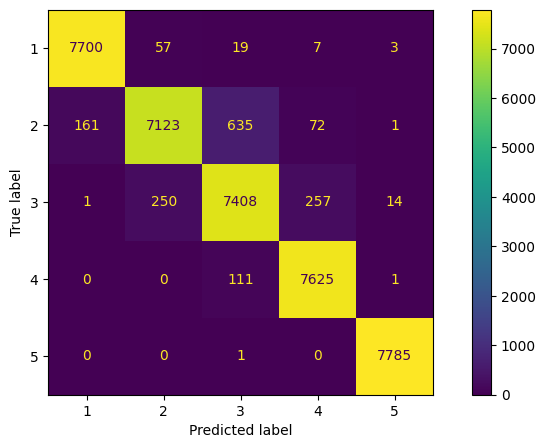

In [49]:
# graficar la matriz de confusión
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score

conf = confusion_matrix(y_test, logisticRegr.predict(X_test))
accuracy = accuracy_score(y_test, logisticRegr.predict(X_test))
print(accuracy)

disp = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=logisticRegr.classes_)
fig, ax = plt.subplots(figsize=(10, 5))  # Ajusta el tamaño según tus necesidades
disp.plot(ax=ax)

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test, logisticRegr.predict(X_test)))

              precision    recall  f1-score   support

           1       0.98      0.99      0.98      7786
           2       0.96      0.89      0.92      7992
           3       0.91      0.93      0.92      7930
           4       0.96      0.99      0.97      7737
           5       1.00      1.00      1.00      7786

    accuracy                           0.96     39231
   macro avg       0.96      0.96      0.96     39231
weighted avg       0.96      0.96      0.96     39231



## 3.2 Naive Bayes

La primera fase para la implementación de Naive bayes es la carga de datos, seguido de la división de los datos en entrenamiento y prueba. Luego la implementación del modelo. 

Debido a la naturaleza de este modelo, no es necesario realizar normalización de los datos, es por esto que se omitió este paso.

In [51]:
# importar datos a un dataframe de master.csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Leer el archivo master.csv
df = pd.read_csv('datosBalanceados.csv')
df.head()

,year,suicides_no,population,gdp_for_year,gdp_per_capita,age_15-24,age_25-34,age_35-54,age_5-14,age_55-74,...,country_Trinidad and Tobago,country_Turkey,country_Turkmenistan,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,suicides/100k pop
0,1987,21,312900,2.156625e+09,796.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
1,1987,16,308000,2.156625e+09,796.0,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,1
2,1987,14,289700,2.156625e+09,796.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
3,1987,1,21800,2.156625e+09,796.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
4,1987,9,274300,2.156625e+09,796.0,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,1


In [52]:
y = df["suicides/100k pop"]
X = df.drop(["suicides/100k pop"], axis=1)

In [53]:
# Dividir los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
# Entrenar el modelo de naive bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [55]:
# Hacer predicciones
y_pred = model.predict(X_test)
print(y_pred)

[3 3 3 ... 3 3 3]


In [56]:
# Evaluar el modelo
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)

Accuracy:  0.276668960770819


In [57]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 314  177 4253    0  518]
 [ 419  161 4316    0  417]
 [   0  131 4780    0  384]
 [   0  591 3304    0 1209]
 [   0  568 2631    0 1981]]


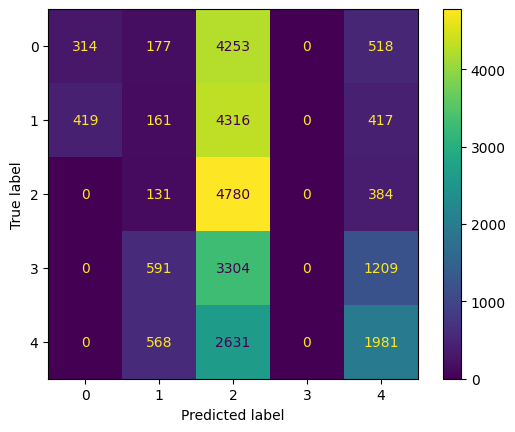

In [58]:
from sklearn.metrics import ConfusionMatrixDisplay
despliegue = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred))
despliegue.plot()

In [59]:
from sklearn.metrics import classification_report
print("Reporte de clasificación: ")
print(classification_report(y_test, y_pred))

Reporte de clasificación: 
              precision    recall  f1-score   support

           1       0.43      0.06      0.10      5262
           2       0.10      0.03      0.05      5313
           3       0.25      0.90      0.39      5295
           4       0.00      0.00      0.00      5104
           5       0.44      0.38      0.41      5180

    accuracy                           0.28     26154
   macro avg       0.24      0.28      0.19     26154
weighted avg       0.24      0.28      0.19     26154



# 4. Creación de varios modelos y selección del mejor

Cree varios modelos, (al menos 3 con cada algoritmo) con los algoritmos seleccionados. Varíe los parámetros buscando el mejor modelo sin caer en un modelo desajustado o sobreajustado. Construya un modelo final con los mejores parámetros. Explique con datos como llegó a ellos.

## 4.1 Regresión Logística
La primera iteración del entrenamiento del modelo de regresión logística arrojó un accuracy de 0.95. Esto es un excelente resultado. Sin embargo, es posible que aun se pueda mejorar. Para esto, se realizará una busqueda de hiperparámetros con GridSearchCV.

Habiendo encontrado los mejores hiperparámetros, se reentrenerá el modelo con estos y se evaluará nuevamente.

In [60]:
# Mejorar el modelo con GridSearchCV
from sklearn.model_selection import GridSearchCV

# Definir los parámetros que quieres ajustar
param_grid = {
    'penalty': ['l1', 'l2', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'saga'], 
    'max_iter': [100]
}

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, n_jobs=-1)

# Ajustar el modelo a los datos
grid_search.fit(X_train, y_train)

# Imprimir los mejores parámetros encontrados
print(grid_search.best_params_)

# Usar el mejor modelo para predecir
best_model = grid_search.best_estimator_
score = best_model.score(X_test, y_test)
print(score)

{'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.3432744513267569


Después del entrenamiento de multiples modelos con diferentes hiperparámetros y de realizar validación cruzada, se encontró que los mejores parámetros son los siguientes: 
- 'C': 100
- 'max_iter': 100
- 'penalty': 'l2'
- 'solver': 'lbfgs'

Teniendo un accuracy de 0.97, se puede concluir que el modelo de regresión logística es un buen modelo para predecir la probabilidad de suicidio.

El accuracy del modelo es: 0.3432744513267569


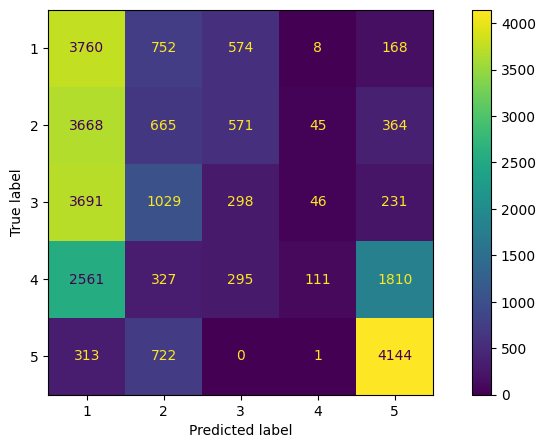

In [61]:
conf = confusion_matrix(y_test, best_model.predict(X_test))
accuracy = accuracy_score(y_test, best_model.predict(X_test))

print(f"El accuracy del modelo es: {accuracy}")

disp = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=best_model.classes_)
fig, ax = plt.subplots(figsize=(10, 5))  # Ajusta el tamaño según tus necesidades
disp.plot(ax=ax)

In [62]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix
print(conf)

[[3760  752  574    8  168]
 [3668  665  571   45  364]
 [3691 1029  298   46  231]
 [2561  327  295  111 1810]
 [ 313  722    0    1 4144]]


In [63]:
print(classification_report(y_test, best_model.predict(X_test)))

              precision    recall  f1-score   support

           1       0.27      0.71      0.39      5262
           2       0.19      0.13      0.15      5313
           3       0.17      0.06      0.08      5295
           4       0.53      0.02      0.04      5104
           5       0.62      0.80      0.70      5180

    accuracy                           0.34     26154
   macro avg       0.35      0.34      0.27     26154
weighted avg       0.35      0.34      0.27     26154



## 4.2 Naive Bayes
La primera iteración del entrenamiento del modelo de Naive Bayes arrojó un accuracy de 0.28. Esto nos indica que el modelo no se logra ajustar a las condiciones de los valores. Sin embargo, es posible que se pueda mejorar. Para esto, se realizará una busqueda de hiperparámetros con GridSearchCV.

Habiendo encontrado los mejores hiperparámetros, se reentrenerá el modelo con estos y se evaluará nuevamente.

In [64]:
# Utilizar validación cruzada
from sklearn.model_selection import GridSearchCV
naive_bayes = GaussianNB()
param_grid = {
    'var_smoothing': np.logspace(0, -9, num=100),  # Var_smoothing values
}
grid = GridSearchCV(naive_bayes, param_grid, cv=10, scoring='accuracy', verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.848035...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [65]:
grid.best_score_

0.29651295046035936

In [66]:
grid.best_params_

{'var_smoothing': 0.1873817422860384}

Después del entrenamiento de multiples modelos con diferentes valores para el hiperparámetro y de realizar validación cruzada, se encontró que el mejor valor de `var_smoothing` es de: 
- `var_smoothing` = 0.187

Teniendo un accuracy de 0.30, se puede concluir que el modelo de Naive Bayes es un mal modelo para predecir la probabilidad de suicidio. Por esta razón y en vista del rendimiento superior al modelo de regresión logística, el modelo de Niave Bayes se descartó.

In [67]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 314  177 4253    0  518]
 [ 419  161 4316    0  417]
 [   0  131 4780    0  384]
 [   0  591 3304    0 1209]
 [   0  568 2631    0 1981]]


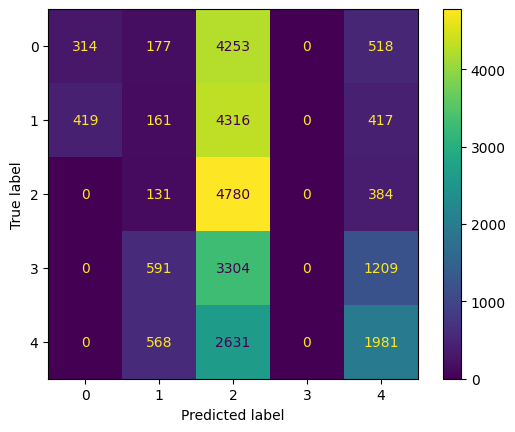

In [68]:
best = grid.best_estimator_
best.fit(X_train, y_train)
y_pred = best.predict(X_test)
despliegue = ConfusionMatrixDisplay(confusion_matrix = cm)
despliegue.plot()

In [69]:
print("Reporte de clasificación: ")
print(classification_report(y_test, y_pred))

Reporte de clasificación: 
              precision    recall  f1-score   support

           1       0.43      0.06      0.10      5262
           2       0.18      0.02      0.04      5313
           3       0.25      0.93      0.40      5295
           4       0.00      0.00      0.00      5104
           5       0.48      0.47      0.47      5180

    accuracy                           0.30     26154
   macro avg       0.27      0.30      0.20     26154
weighted avg       0.27      0.30      0.20     26154



# Conclusiones

Los resultados de los modelos de regresión logística y Naive Bayes muestran diferencias significativas en su capacidad para clasificar correctamente los grupos de probabilidad de suicidio. La regresión logística presentó una mayor precisión en los grupos de menor riesgo, aunque con confusiones notables en los grupos de mayor riesgo, como se observa en el grupo 5, donde se clasificaron incorrectamente 313 instancias en el grupo 1 y 722 en el grupo 2, pero solo 1 instancia se clasificó correctamente. En contraste, el modelo de Naive Bayes mostró una tendencia a clasificar la mayoría de las instancias en los grupos intermedios, con una alta concentración en el grupo 3 (por ejemplo, 4,780 instancias del grupo 3 fueron clasificadas correctamente). Sin embargo, Naive Bayes tuvo dificultades significativas para clasificar correctamente los extremos, especialmente el grupo 5, con un alto número de instancias del grupo 5 clasificadas incorrectamente en los grupos 3 y 4.